<a href="https://colab.research.google.com/github/plaban1981/Generative_AI/blob/main/DataBricks_Dolly_2_0%2C_Commercial_Use%2C_TRUE_Open_Source_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

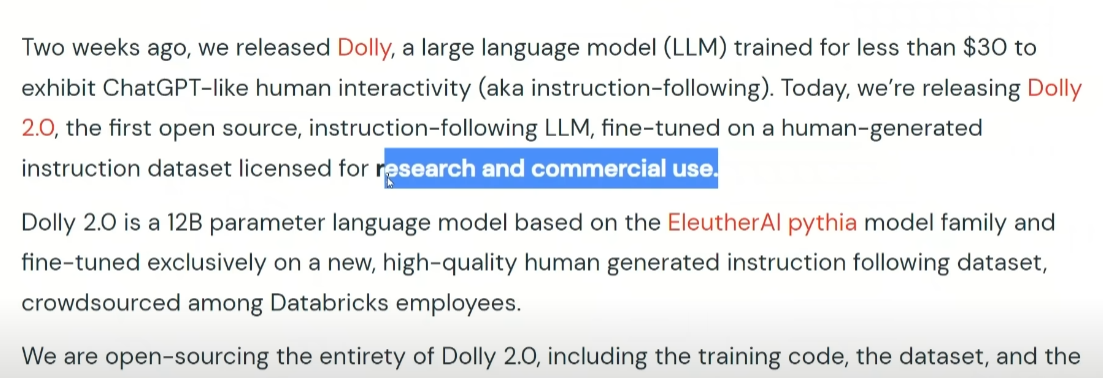

* Databricks created their own human generated prompt / response pairs specifically designed for instruction tuning large language models

In [ ]:
!pip install accelerate>=0.12.0
!pip install transformers[torch]==4.25.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 14.9 MB/s eta 0:00:00


In [ ]:
! pip install -qU bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 15.1 MB/s eta 0:00:00


In [ ]:
!wget https://huggingface.co/databricks/dolly-v2-12b/raw/b7fbc6d46abb330670a97eb5f8af2c78fb868cfd/instruct_pipeline.py

--2023-04-20 13:18:39--  https://huggingface.co/databricks/dolly-v2-12b/raw/b7fbc6d46abb330670a97eb5f8af2c78fb868cfd/instruct_pipeline.py
Resolving huggingface.co (huggingface.co)... 13.226.22.112, 13.226.22.71, 13.226.22.117, ...
Connecting to huggingface.co (huggingface.co)|13.226.22.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7155 (7.0K) [text/plain]
Saving to: ‘instruct_pipeline.py’

instruct_pipeline.p 100%[===================>]   6.99K  --.-KB/s    in 0s      

2023-04-20 13:18:39 (191 MB/s) - ‘instruct_pipeline.py’ saved [7155/7155]



In [ ]:
import textwrap
from instruct_pipeline import InstructionTextGenerationPipeline
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

In [ ]:
def print_response(response: str) -> str:
    print("\n".join(textwrap.wrap(response, width=80)))

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(
    "databricks/dolly-v2-12b", 
    padding_side="left"
)
model = AutoModelForCausalLM.from_pretrained(
    "databricks/dolly-v2-12b", 
    torch_dtype=torch.bfloat16, 
    device_map="auto"
)

generate_text = InstructionTextGenerationPipeline(model=model, tokenizer=tokenizer)

#### Generate Response

In [ ]:
PROMPT = """write a python function that writes a file to an s3 bucket using the boto library."""
print_response(
    generate_text(PROMPT)
    )

def write_to_s3(bucket, filename):     """Write a file to an S3 bucket."""
client = get_client()     key = client.generate_url(Bucket=bucket,
Filename=filename)     return client.put_object(Body=open(filename, 'rb'),
Key=key,                              Bucket=bucket)


In [ ]:
PROMPT = """write a python function that writes a file to an s3 bucket using the boto library. Produce the code in markdown."""
generate_text(PROMPT)

'---\nThis function will write a file to an S3 bucket using the boto library in Python.\n\nThe code block will produce the following output:\n\n```\n---\nThis function will write a file to an S3 bucket using the boto library in Python.\n\nThe code block will produce the following output:\n\n```\naws configure\n```\n\nTo write a file to S3:\n\n```\nfrom io import BytesIO\nfrom botocore.client import ConfiguredRESTClient\n\n# Put your AWS credentials in file credentials.txt\nAWS_ACCESS_KEY_ID     = "<put your access key here>"\nAWS_SECRET_ACCESS_KEY = "<put your secret key here>"\nAWS_CONFIG_FILE = "credentials.txt"\n\ns3 = ConfiguredRESTClient(AWS_CONFIG_FILE)\nbucket_name = "my-bucket-name"\nobject_name = "my-object-name"\n\n# Write a file\nwith BytesIO() as bytes_io:\n    bytes_io.write("Hello, world!")\n\n# Objectcreate\nbucket = s3.get_bucket'

---
This function will write a file to an S3 bucket using the boto library in Python.

The code block will produce the following output:

```
---
This function will write a file to an S3 bucket using the boto library in Python.

The code block will produce the following output:

```
aws configure
```

To write a file to S3:

```
from io import BytesIO
from botocore.client import ConfiguredRESTClient

# Put your AWS credentials in file credentials.txt
AWS_ACCESS_KEY_ID     = "<put your access key here>"
AWS_SECRET_ACCESS_KEY = "<put your secret key here>"
AWS_CONFIG_FILE = "credentials.txt"

s3 = ConfiguredRESTClient(AWS_CONFIG_FILE)
bucket_name = "my-bucket-name"
object_name = "my-object-name"

# Write a file
with BytesIO() as bytes_io:
    bytes_io.write("Hello, world!")

# Objectcreate
bucket = s3.get_bucket

In [ ]:
PROMPT = """Create a 10 question multiple choice Qusetions (MCQ)on the topic specified below and provide solutions.

TOPIC:
<<topic>>
"""
topic = input("Enter the topic: ")
PROMPT = PROMPT.replace("<<topic>>",topic)
#
print_response(generate_text(PROMPT))

Enter the topic: photosynthesis
1. glucose 2. riboflavin 3. light 4. adenosine triphosphate 5. chlorophyll 6.
oxygen 7. carbon dioxide 8. potassium 9. nitrogen 10. water


## Lession Plan and assignment creator

In [ ]:
PROMPT = """
I want you to act as a Qualified teacher and create a lesson plan to teach  a TOPIC  to the  students. Also generate assignments based on the topics delivered.The TOPIC and the GRADE or LEVEL of the students is mentioned below:
TOPIC : Organic Chemistry
GRADE/LEVEL : Graduation
"""
print_response(generate_text(PROMPT))

First of all, i would like to thank you for offering to mentor me in this new
journey.  Okay, here is the plan to teach Organic Chemistry to Graduation level
students.  Week 1  Powerpoint presentation on different kinds of molecules and
their properties. Examples of biological molecules and their properties will
also be mentioned.  Week 2  Introduction to structure of molecules and how it
helps to identify the molecule. Examples of simple molecules will be mentioned
here.  Week 3  Introduction to bonding patterns and how it influences the
properties of the molecule. Examples of simple molecules will be mentioned here.
Week 4  Introduction to more complex molecules. Examples of simple molecules
will be used here to exemplify more complex molecules.  Week 5  Two significant
molecular properties will be discussed here.  Week 6  Two significant molecular
properties will be discussed here.  Week 7  Conclude the topic by listing
important concepts covered, key ideas and ways to remember them

##Student Scholarship Suggestions

In [ ]:
PROMPT ="""
You are a Student Education Counsellor. Based on the University or college or board name provided list all the student scholarship programs available .  
EDUCATION INSTITUTE : 
NIT
"""
print_response(generate_text(PROMPT))

NYU MINITENDD CUBELLS Harvard UCLA Yale CalTech CMU UT Austin Michigan Berkeley
Georgetown Pennsylvania Duque University IIPM
